Лучшее решение: [ 1.32562633  1.75290566 -0.05814059 -0.95874875 -1.23085392 -0.50425536
  1.35578055  0.93248695  0.83208062  0.59855565  1.66012393 -0.89511865
  1.44840926  0.75434209  1.15115908 -1.4636981  -0.38673559 -1.63785612
 -0.18610472  1.13968584 -0.3962615   1.15255254  0.73091166  0.07664316
  1.17952346 -0.12107555  0.05553807  1.58057513 -0.49970394 -0.52845488
  1.45287319 -0.99847555  0.46993274  0.1363126  -0.3260873   0.83792306
  1.63299487 -1.05764206  2.22421681 -0.49149409]
Лучшая приспособленность: 11.42600020057654


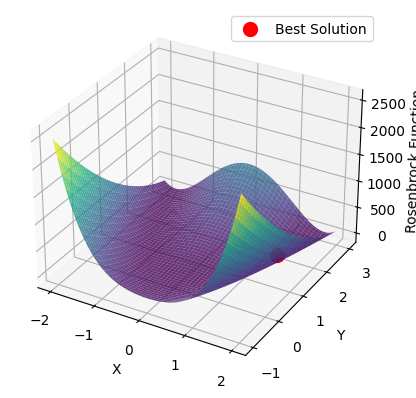

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def rosenbrock(x, y):
    return 100.0 * (y - x**2)**2 + (1 - x)**2

def first_population(psize, num_genes):
    return np.random.uniform(-2.048, 2.048, size=(pop_size, num_genes))

# Функция для вычисления приспособленности особи
def fitness(individual):
    x, y = individual[0], individual[1]
    return 1.0 / (rosenbrock(x, y) + 1e-6)  # Используем 1/(f(x, y) + epsilon) для избежания деления на 0

# Генетический алгоритм
def genetic_algorithm(psize, num_genes, num_generations, mutation_rate):
    # Инициализация начальной популяции
    population = first_population(pop_size, num_genes)

    # Переменные для хранения лучшего решения
    best_solution = None
    best_fitness = float('-inf')

    for generation in range(num_generations):
        # Оценка приспособленности каждой особи
        fitness_scores = np.array([fitness(individual) for individual in population])

        # Выбор особей для скрещивания
        selected_indices = np.random.choice(pop_size, size=pop_size, p=fitness_scores/fitness_scores.sum())
        selected_population = population[selected_indices]

        # Скрещивание
        children = []
        for i in range(0, pop_size, 2):
            parent1, parent2 = selected_population[i], selected_population[i+1]
            crossover_point = np.random.randint(1, num_genes)
            child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
            child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
            children.extend([child1, child2])

        children = np.array(children)

        # Мутация
        mutation_mask = np.random.random(children.shape) < mutation_rate
        children += np.random.uniform(-0.1, 0.1, size=children.shape) * mutation_mask

        # Обновление популяции
        population = children

        # Обновление лучшего решения
        for ind, score in zip(population, fitness_scores):
            if score > best_fitness:
                best_solution = ind
                best_fitness = score

    return best_solution, best_fitness

# Параметры генетического алгоритма
pop_size = 100
num_genes = 40
num_generations = 250
mutation_rate = 0.1

# Запуск генетического алгоритма
best_solution, best_fitness = genetic_algorithm(pop_size, num_genes, num_generations, mutation_rate)

# Создание гиперплоскости Розенброка
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = rosenbrock(x_vals, y_vals)

# Отображение гиперплоскости Розенброка
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_vals, y_vals, z_vals, cmap='viridis', alpha=0.8)

# Отображение лучшего решения на графике
ax.scatter([best_solution[0]], [best_solution[1]],
           rosenbrock(best_solution[0], best_solution[1]),
           color='red', s=100, label='Best Solution')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Rosenbrock Function')
ax.legend()

# Вывод результата
print("Лучшее решение:", best_solution)
print("Лучшая приспособленность:", best_fitness)

# Отображение графика
plt.show()